# Verification of QAOA statements concerning MaxCut

In the following I want to verify the statement that for MaxCut restricted to input graphs of fixed degree 3 and $p=1$ the QAOA always produces a cut at least 0.6924 times the size of the optimal cut. This value is suggested in Farhi E.; Goldstone J.; Gutmann S.; A Quantum Approximate Optimization Algorithm. arXiv:1411.4028, 2014. Furthermore a visual analysis of various properties of the algorithm is performed in order to improve the understanding.

In [1]:
import scipy as sp
from scipy.linalg import expm, sinm, cosm # handling matrix exponential, sinus and cosinus

from sympy import Symbol, Matrix # handling symbolic matrix expressions
from sympy.physics.quantum import TensorProduct # useful to perform tensor products 

import numpy as np

import matplotlib.pyplot as plt
from basic_units import radians, degrees, cos

## Definition of $C_g$ and $B_g$ for the subgraphs

For MaxCut restricted to input graphs of fixed degree 3 and $p=1$ ($ = 1 \,\gamma$ and $1 \,\beta$ angle) there are three possible subgraphs ($g_4, g_5, g_6$) for every edge $\langle jk \rangle$ in the graph. In the following the constraint operator $C$ and the operator $B$ restricted to the subraphs are defined. The following definitions apply:

\begin{equation}
    \begin{split}
        C_g &= \sum_{\langle ll'\rangle \in G} C_{\langle ll'\rangle} \\
        C_{\langle ll'\rangle} &= \frac{1}{2} \left(1 - \sigma_j^z \sigma_k^z\right) \\
        B_g &= \sum_{j\in G} \sigma_j^x
    \end{split}
\end{equation}

In [2]:
def C_B_g4():
    tensor_identity = TensorProduct(identity,identity,identity,identity) # identity operator in 4 qubit space
    
    # define the C_ll' operators for every edge in the corresponding subgraph
    C_12 = 0.5*(-TensorProduct(sigma_z,sigma_z,identity,identity)+tensor_identity)
    C_13 = 0.5*(-TensorProduct(sigma_z,identity,sigma_z,identity)+tensor_identity)
    C_14 = 0.5*(-TensorProduct(sigma_z,identity,identity,sigma_z)+tensor_identity)
    C_23 = 0.5*(-TensorProduct(identity,sigma_z,sigma_z,identity)+tensor_identity)
    C_34 = 0.5*(-TensorProduct(identity,identity,sigma_z,sigma_z)+tensor_identity)
    
    C_g = C_12 + C_13 + C_14 + C_23 + C_34 # the constraint operator C restricted to subgraph g4
    
    # define the sigma_x operators for all qubits in subgraph g4
    sigma_x_1 = TensorProduct(sigma_x,identity,identity,identity)
    sigma_x_2 = TensorProduct(identity,sigma_x,identity,identity)
    sigma_x_3 = TensorProduct(identity,identity,sigma_x,identity)
    sigma_x_4 = TensorProduct(identity,identity,identity,sigma_x)
    
    B_g = sigma_x_1 + sigma_x_2 + sigma_x_3 + sigma_x_4 # sum the corresponding simga_x_i operators
    
    return np.array(C_g).astype(np.float64), np.array(C_13).astype(np.float64), np.array(B_g).astype(np.float64)

In [3]:
def C_B_g5():
    tensor_identity = TensorProduct(identity,identity,identity,identity,identity) # identity operator in 5 qubit space
    
    # define the C_ll' operators for every edge in the corresponding subgraph
    C_12 = 0.5*(-TensorProduct(sigma_z,sigma_z,identity,identity,identity)+tensor_identity)
    C_13 = 0.5*(-TensorProduct(sigma_z,identity,sigma_z,identity,identity)+tensor_identity)
    C_15 = 0.5*(-TensorProduct(sigma_z,identity,identity,identity,sigma_z)+tensor_identity)
    C_23 = 0.5*(-TensorProduct(identity,sigma_z,sigma_z,identity,identity)+tensor_identity)
    C_34 = 0.5*(-TensorProduct(identity,identity,sigma_z,sigma_z,identity)+tensor_identity)
    
    C_g = C_12 + C_13 + C_15 + C_23 + C_34 # the constraint operator C restricted to subgraph g5
    
    # define the sigma_x operators for all qubits in subgraph g5
    sigma_x_1 = TensorProduct(sigma_x,identity,identity,identity,identity)
    sigma_x_2 = TensorProduct(identity,sigma_x,identity,identity,identity)
    sigma_x_3 = TensorProduct(identity,identity,sigma_x,identity,identity)
    sigma_x_4 = TensorProduct(identity,identity,identity,sigma_x,identity)
    sigma_x_5 = TensorProduct(identity,identity,identity,identity,sigma_x)
    
    B_g = sigma_x_1 + sigma_x_2 + sigma_x_3 + sigma_x_4 + sigma_x_5 # sum the corresponding simga_x_i operators
    
    return np.array(C_g).astype(np.float64), np.array(C_13).astype(np.float64), np.array(B_g).astype(np.float64)

In [4]:
def C_B_g6():
    tensor_identity = TensorProduct(identity,identity,identity,identity,identity,identity) # identity operator in 6 qubit space
    
    # define the C_ll' operators for every edge in the corresponding subgraph
    C_12 = 0.5*(-TensorProduct(sigma_z,sigma_z,identity,identity,identity,identity)+tensor_identity)
    C_23 = 0.5*(-TensorProduct(identity,sigma_z,sigma_z,identity,identity,identity)+tensor_identity)
    C_26 = 0.5*(-TensorProduct(identity,sigma_z,identity,identity,identity,sigma_z)+tensor_identity)
    C_34 = 0.5*(-TensorProduct(identity,identity,sigma_z,sigma_z,identity,identity)+tensor_identity)
    C_35 = 0.5*(-TensorProduct(identity,identity,sigma_z,identity,sigma_z,identity)+tensor_identity)
    
    C_g = C_12 + C_23 + C_26 + C_34 + C_35 # the constraint operator C restricted to subgraph g6
    
    # define the sigma_x operators for all qubits in subgraph g6
    sigma_x_1 = TensorProduct(sigma_x,identity,identity,identity,identity,identity)
    sigma_x_2 = TensorProduct(identity,sigma_x,identity,identity,identity,identity)
    sigma_x_3 = TensorProduct(identity,identity,sigma_x,identity,identity,identity)
    sigma_x_4 = TensorProduct(identity,identity,identity,sigma_x,identity,identity)
    sigma_x_5 = TensorProduct(identity,identity,identity,identity,sigma_x,identity)
    sigma_x_6 = TensorProduct(identity,identity,identity,identity,identity,sigma_x)
    
    B_g = sigma_x_1 + sigma_x_2 + sigma_x_3 + sigma_x_4 + sigma_x_5 + sigma_x_6 # sum the corresponding simga_x_i operators
    
    return np.array(C_g).astype(np.float64), np.array(C_23).astype(np.float64), np.array(B_g).astype(np.float64)

## Evolution matrices $U\left(C_g\right)$ and $U\left(B_g\right)$

In [5]:
def U_C_B(C_g_i, B_g_i, gamma, beta):
    U_C_g_i = expm(-1j * gamma * C_g_i) # matrix exponential of the constraint operator restricted to the subgraph times the angle gamma (needs to be scalar)
    U_B_g_i = expm(-1j * beta * B_g_i) # matrix exponential of the constraint operator restricted to the subgraph times the angle beta
    
    return np.asmatrix(U_C_g_i), np.asmatrix(U_B_g_i)

## Calculate the contribution $f_g$ for all/many $\left(\gamma, \beta\right) \in \left[0,2\pi\right] \times \left[0,\pi\right]$ 
For every subgraph $g_4, g_5, g_6$ the contribution $f_{g_i}$ to $F_p$ is calculated.

In [6]:
def get_state_gamma_beta(U_B_gi, U_C_gi, s_gi):
    return U_B_gi * U_C_gi * s_gi

In [7]:
def get_f_g4(gamma, beta, C_g4_m, C_13_g4, B_g4, s_g4):
    f_g = np.zeros((len(gamma),len(beta)), dtype=complex)
    
    for i in range(len(gamma)):
        for j in range(len(beta)):
            U_C_g4, U_B_g4 = U_C_B(C_g4_m, B_g4, gamma[i], beta[j]) # calculate the evolution matrices
            gamma_beta_state = get_state_gamma_beta(U_B_g4, U_C_g4, s_g4) # perform the state evolution
            f_g4 = gamma_beta_state.getH() * C_13_g4 * gamma_beta_state # expectation value of evolved state
            f_g[i,j] = f_g4[0,0] # store the result of f_g
        
    return f_g

In [8]:
def get_f_g5(gamma, beta, C_g5_m, C_13_g5, B_g5, s_g5):
    f_g = np.zeros((len(gamma),len(beta)), dtype=complex)
    
    for i in range(len(gamma)):
        for j in range(len(beta)):
            U_C_g5, U_B_g5 = U_C_B(C_g5_m, B_g5, gamma[i], beta[j])
            gamma_beta_state = get_state_gamma_beta(U_B_g5, U_C_g5, s_g5)
            f_g5 = gamma_beta_state.getH() * C_13_g5 * gamma_beta_state # expectation value of evolved state
            f_g[i,j] = f_g5[0,0] # store the result of f_g
        
    return f_g

In [9]:
def get_f_g6(gamma, beta, C_g6_m, C_23_g6, B_g6, s_g6):
    f_g = np.zeros((len(gamma),len(beta)), dtype=complex)
    
    for i in range(len(gamma)):
        for j in range(len(beta)):
            U_C_g6, U_B_g6 = U_C_B(C_g6_m, B_g6, gamma[i], beta[j]) # calculate the evolution matrices
            gamma_beta_state = get_state_gamma_beta(U_B_g6, U_C_g6, s_g6) # perform the state evolution
            f_g6 = gamma_beta_state.getH() * C_23_g6 * gamma_beta_state # expectation value of evolved state
            f_g[i,j] = f_g6[0,0] # store the result of f_g
        
    return f_g

In [10]:
# calculates |gamma,beta> for all gamma, beta and stores one component (variable "component") in an array for every
# combination of gamma and beta
def get_component_state_gamma_beta(gamma, beta, C_g_i_m, B_g_i, s_g_i, component):
    comp = np.zeros((len(gamma),len(beta)), dtype=complex) # should store the value of the state |gamma,beta> in position "component" 
    
    for i in range(len(gamma)):
        for j in range(len(beta)):
            U_C_g_i, U_B_g_i = U_C_B(C_g_i_m, B_g_i, gamma[i], beta[j]) # calculate the evolution matrices
            gamma_beta_state = get_state_gamma_beta(U_B_g_i, U_C_g_i, s_g_i) # perform the state evolution
            comp[i,j] = gamma_beta_state[component,0] # store the value at position "component" for gamma, beta 
        
    return comp

## Main part where above defined functions are executed
Definition of Pauli-Matrixes:

In [11]:
sigma_x = Matrix([[0,1],[1,0]])
sigma_y = Matrix([[0,-1j],[1j,0]])
sigma_z = Matrix([[1,0],[0,-1]])
identity = Matrix([[1,0],[0,1]])

Initial states $\lvert s_{g_i}\rangle = \Pi_{l\in G} \lvert + \rangle_l$ for every subgraph:

In [12]:
s_g4 = (2**4)**(-0.5) * np.asmatrix(np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])).T
s_g5 = (2**5)**(-0.5) * np.asmatrix(np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])).T
s_g6 = (2**6)**(-0.5) * np.asmatrix(np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])).T

In [13]:
scan_number = 30 # how many gamma and beta angle values should be scanned / calculated, for 130 the result is 0.692410 but takes some time

gamma = np.linspace(0,2*np.pi,scan_number)
beta = np.linspace(0,np.pi,scan_number)

In [14]:
# calculate the constraint and B matrices for every subgraph
C_g4_m, C_13_g4, B_g4 = C_B_g4() 
C_g5_m, C_13_g5, B_g5 = C_B_g5()
C_g6_m, C_23_g6, B_g6 = C_B_g6()

Calculate the contributions $f_{g_i}$:

In [15]:
f_g4 = get_f_g4(gamma, beta, C_g4_m, C_13_g4, B_g4, s_g4)
f_g5 = get_f_g5(gamma, beta, C_g5_m, C_13_g5, B_g5, s_g5)
f_g6 = get_f_g6(gamma, beta, C_g6_m, C_23_g6, B_g6, s_g6)

The function to maximize is

\begin{equation}
    F_1 \left(\gamma,\beta\right) = S f_{g_4} \left(\gamma,\beta\right) + \left(4S+3T\right) f_{g_5} \left(\gamma,\beta\right) + \left(\frac{3}{2} n - 5S-3T\right) f_{g_6} \left(\gamma,\beta\right).
\end{equation}

We can give an upper bound for the maximum cut if we make distinction in "crossed squares" $S$ and "isolated triangles" $T$,

\begin{equation}
    \text{#(edges between subgraphs after MaxCut)} <= \frac{3}{2} n - S -T
\end{equation}

since in every square and triangle there must be at least one edge solely belonging to one subgraph. Thus

\begin{equation}
    \text{Approximation ratio} = \frac{\text{max}_{\gamma,\beta} F_1 \left(\gamma,\beta\right)}{\frac{3}{2} n - S - T} = \frac{\text{max}_{\gamma,\beta} F_1 \left(\gamma,\beta\right) / n}{\frac{3}{2} - s - t}
\end{equation}

For $s,t > 0$ the numerator grows faster than the denominator which means that the minimum approximation ratio is taken for $s=t=0$. Then the following holds,

\begin{equation}
    \text{Approximation ratio} = f_{g_6} \left(\gamma,\beta\right).
\end{equation}

In [16]:
# note that there may be more gamma, beta combinations for which f_g6 is maximal
appr_ratio = np.max(f_g6.real)
ind_g6 = np.unravel_index(np.argmax(f_g6.real, axis=None), f_g6.real.shape) # get index of maximum in g6 (corresponds to set of angles for which aprrox ratio is maximal)
print("index = ", ind_g6)
print("gamma = ", gamma[ind_g6[0]])
print("beta = ", beta[ind_g6[1]])
print("Approximation ratio = ", f_g6.real[ind_g6[0],ind_g6[1]])

index =  (26, 11)
gamma =  5.6332006202299745
beta =  1.191638592740956
Approximation ratio =  0.691487621312373


In [30]:
# useful for the plots later and the probability distribution of the bits
ind_g4 = np.unravel_index(np.argmax(f_g4.real, axis=None), f_g4.real.shape) # get index of maximum in g4
ind_g5 = np.unravel_index(np.argmax(f_g5.real, axis=None), f_g5.real.shape) # get index of maximum in g4

It is interesting to see, how the individual components of the state $\lvert \gamma, \beta\rangle$ evolve. In the following I calculate the state $\lvert \gamma, \beta\rangle$ for all $\gamma, \beta$ and choose one component to plot.

In [18]:
# choose component to track for each subgraph, note: dim(g4) = 2^4 = 16, dim(g5) = 2^5 = 32, dim(g6) = 2^6 = 64
component_g4 = 8 
component_g5 = 10
component_g6 = 26

# calculate state vectors |gamma,beta> and choose the component value set above for every gamma, beta
state_gamma_beta_g4 = get_component_state_gamma_beta(gamma, beta, C_g4_m, B_g4, s_g4, component_g4)
state_gamma_beta_g5 = get_component_state_gamma_beta(gamma, beta, C_g5_m, B_g5, s_g5, component_g5)
state_gamma_beta_g6 = get_component_state_gamma_beta(gamma, beta, C_g6_m, B_g6, s_g6, component_g6)

probability_amps_g4 = (np.conjugate(state_gamma_beta_g4) * state_gamma_beta_g4).real
probability_amps_g5 = (np.conjugate(state_gamma_beta_g5) * state_gamma_beta_g5).real
probability_amps_g6 = (np.conjugate(state_gamma_beta_g6) * state_gamma_beta_g6).real

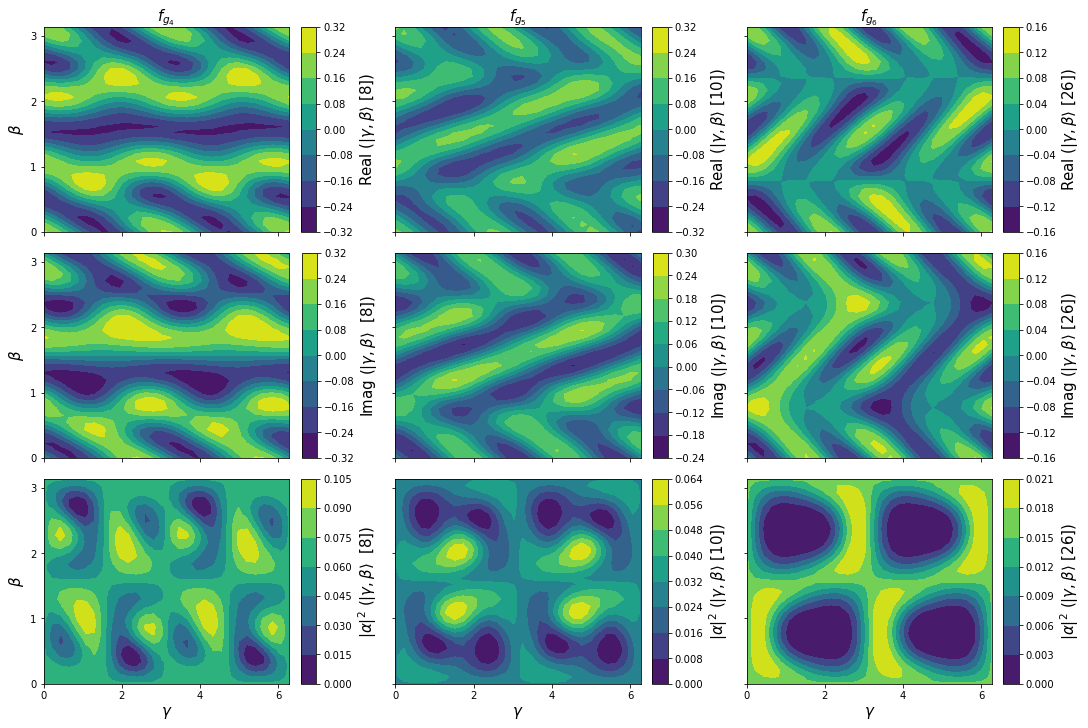

In [19]:
font_size = 15 # label font size
fig, axs = plt.subplots(3,3, constrained_layout=True, figsize=(15,10), sharey=True, sharex=True)

# plot real parts
cs = axs[0,0].contourf(gamma,beta,state_gamma_beta_g4.real,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[0,0])
cbar.ax.set_ylabel(r'Real ($| \gamma, \beta\rangle$ $[$'+str(component_g4)+"$]$)", fontsize=font_size)
axs[0,0].locator_params(nbins=4)

cs = axs[0,1].contourf(gamma,beta,state_gamma_beta_g5.real,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[0,1])
cbar.ax.set_ylabel(r'Real ($| \gamma, \beta\rangle$ $[$'+str(component_g5)+"$]$)", fontsize=font_size)
axs[0,1].locator_params(nbins=4)

cs = axs[0,2].contourf(gamma,beta,state_gamma_beta_g6.real,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[0,2])
cbar.ax.set_ylabel(r'Real ($| \gamma, \beta\rangle$ $[$'+str(component_g6)+"$]$)", fontsize=font_size)
axs[0,2].locator_params(nbins=4)

# plot imaginary parts
cs = axs[1,0].contourf(gamma,beta,state_gamma_beta_g4.imag,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[1,0])
cbar.ax.set_ylabel(r'Imag ($| \gamma, \beta\rangle$  $[$'+str(component_g4)+"$]$)", fontsize=font_size)
axs[1,0].locator_params(nbins=4)

cs = axs[1,1].contourf(gamma,beta,state_gamma_beta_g5.imag,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[1,1])
cbar.ax.set_ylabel(r'Imag ($| \gamma, \beta\rangle$ $[$'+str(component_g5)+"$]$)", fontsize=font_size)
axs[1,1].locator_params(nbins=4)

cs = axs[1,2].contourf(gamma,beta,state_gamma_beta_g6.imag,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[1,2])
cbar.ax.set_ylabel(r'Imag ($| \gamma, \beta\rangle$ $[$'+str(component_g6)+"$]$)", fontsize=font_size)
axs[1,2].locator_params(nbins=4)

# plot betrag of the chosen component
cs = axs[2,0].contourf(gamma,beta,probability_amps_g4,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[2,0])
cbar.ax.set_ylabel(r'$|\alpha|^2$ ($| \gamma, \beta\rangle$  $[$'+str(component_g4)+"$]$)", fontsize=font_size)
axs[2,0].locator_params(nbins=4)

cs = axs[2,1].contourf(gamma,beta,probability_amps_g5,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[2,1])
cbar.ax.set_ylabel(r'$|\alpha|^2$ ($| \gamma, \beta\rangle$ $[$'+str(component_g5)+"$]$)", fontsize=font_size)
axs[2,1].locator_params(nbins=4)

cs = axs[2,2].contourf(gamma,beta,probability_amps_g6,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[2,2])
cbar.ax.set_ylabel(r'$|\alpha|^2$ ($| \gamma, \beta\rangle$ $[$'+str(component_g6)+"$]$)", fontsize=font_size)
axs[2,2].locator_params(nbins=4)

axs[0,0].set_title(r'$f_{g_4}$', fontsize=font_size)
axs[0,1].set_title(r'$f_{g_5}$', fontsize=font_size)
axs[0,2].set_title(r'$f_{g_6}$', fontsize=font_size)

axs[2,0].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[2,1].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[2,2].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[0,0].set_ylabel(r"$\beta$", fontsize=font_size)
axs[1,0].set_ylabel(r"$\beta$", fontsize=font_size)
axs[2,0].set_ylabel(r"$\beta$", fontsize=font_size)

plt.savefig("images/contour_phase_plots_gamma-beta_state_g4_g5_g6_angle_dependence_real_"+str(component_g4)+"comp_g4"+str(scan_number)+"_scans.png", dpi=200)

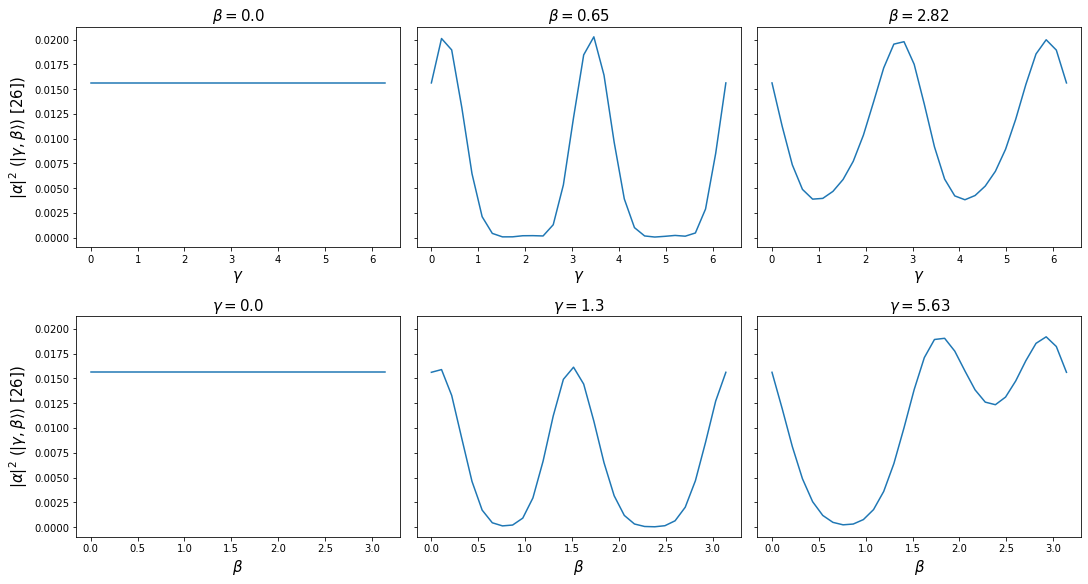

In [20]:
font_size = 15 # label font size
fig, axs = plt.subplots(2,3, constrained_layout=True, figsize=(15,8), sharey=True)

state_comp_1 = 0 # set the gamma, beta values which are hold constant
state_comp_2 = 6
state_comp_3 = 26

axs[0,0].plot(gamma,probability_amps_g6[state_comp_1].real,xunits=radians,yunits=radians)
axs[0,1].plot(gamma,probability_amps_g6[state_comp_2].real,xunits=radians,yunits=radians)
axs[0,2].plot(gamma,probability_amps_g6[state_comp_3].real,xunits=radians,yunits=radians)

axs[1,0].plot(beta,probability_amps_g6.T[state_comp_1].real,xunits=radians,yunits=radians) # transpose is to identify the beta dependence!
axs[1,1].plot(beta,probability_amps_g6.T[state_comp_2].real,xunits=radians,yunits=radians)
axs[1,2].plot(beta,probability_amps_g6.T[state_comp_3].real,xunits=radians,yunits=radians)

# setting plot titles so that one knows all relevant parameters of the plots
axs[0,0].set_title(r'$\beta = $'+str(round(beta[state_comp_1],2)), fontsize=font_size)
axs[0,1].set_title(r'$\beta = $'+str(round(beta[state_comp_2],2)), fontsize=font_size)
axs[0,2].set_title(r'$\beta = $'+str(round(beta[state_comp_3],2)), fontsize=font_size)

axs[1,0].set_title(r'$\gamma = $'+str(round(gamma[state_comp_1],2)), fontsize=font_size)
axs[1,1].set_title(r'$\gamma = $'+str(round(gamma[state_comp_2],2)), fontsize=font_size)
axs[1,2].set_title(r'$\gamma = $'+str(round(gamma[state_comp_3],2)), fontsize=font_size)

# setting axis label
axs[0,0].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[0,1].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[0,2].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[0,0].set_ylabel(r"$|\alpha|^2$ ($| \gamma, \beta\rangle$) $[$"+str(component_g6)+"$]$)", fontsize=font_size)

axs[1,0].set_xlabel(r"$\beta$", fontsize=font_size)
axs[1,1].set_xlabel(r"$\beta$", fontsize=font_size)
axs[1,2].set_xlabel(r"$\beta$", fontsize=font_size)
axs[1,0].set_ylabel(r"$|\alpha|^2$ ($| \gamma, \beta\rangle$) $[$"+str(component_g6)+"$]$)", fontsize=font_size)

plt.savefig("images/probability_plots_f_g6_angle_dependence_"+str(component_g4)+"comp"+str(scan_number)+"_scans.png", dpi=200)

In [21]:
U_C_g4, U_B_g4 = U_C_B(C_g4_m, B_g4, gamma[ind_g4[0]], beta[ind_g4[1]]) # calculate the evolution matrices
gamma_beta_state_g4 = np.asarray(get_state_gamma_beta(U_B_g4, U_C_g4, s_g4)) # calculate the state
probability_amps_g4 = (np.conjugate(gamma_beta_state_g4) * gamma_beta_state_g4).real # calculate the probabilities of every component

U_C_g5, U_B_g5 = U_C_B(C_g5_m, B_g5, gamma[ind_g5[0]], beta[ind_g5[1]]) # calculate the evolution matrices
gamma_beta_state_g5 = np.asarray(get_state_gamma_beta(U_B_g5, U_C_g5, s_g5)) # calculate the state
probability_amps_g5 = (np.conjugate(gamma_beta_state_g5) * gamma_beta_state_g5).real

U_C_g6, U_B_g6 = U_C_B(C_g6_m, B_g6, gamma[ind_g6[0]], beta[ind_g6[1]]) # calculate the evolution matrices
gamma_beta_state_g6 = np.asarray(get_state_gamma_beta(U_B_g6, U_C_g6, s_g6)) # calculate the state
probability_amps_g6 = (np.conjugate(gamma_beta_state_g6) * gamma_beta_state_g6).real

In [22]:
# function to convert the arrays into proper arrays which can be processed by ax.bar() for plotting!
def convert_array_to_size(array):
    new_array = np.zeros(len(array))
    for i in range(len(new_array)):
        new_array[i] = array[i,0]
    return new_array

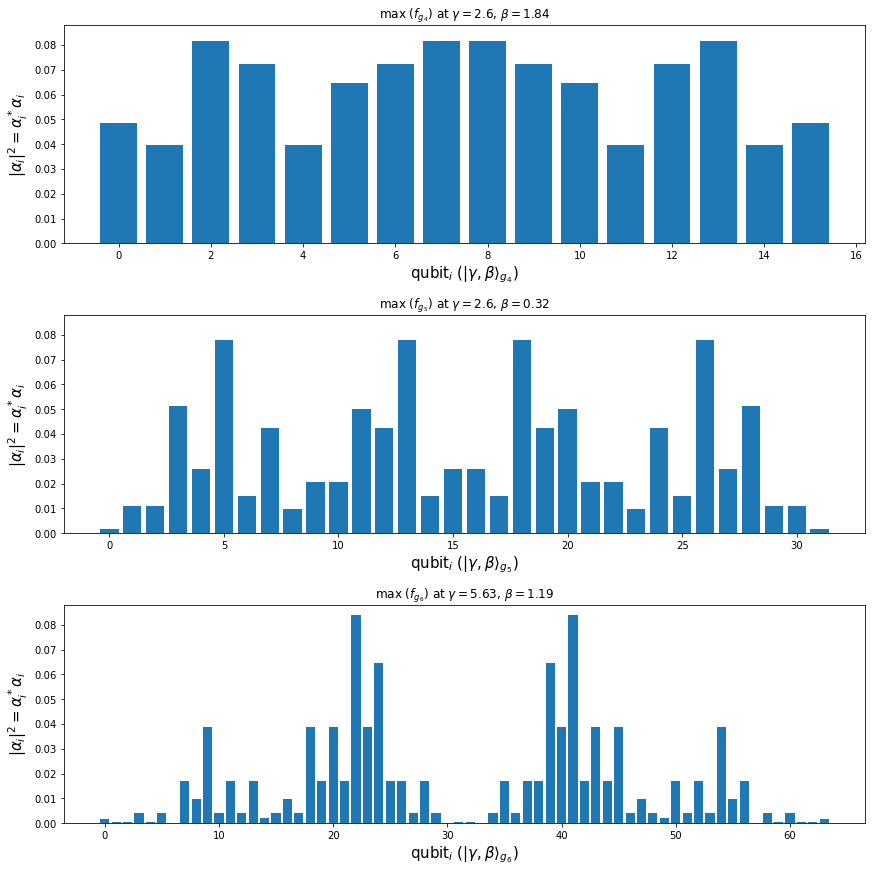

In [35]:
font_size = 15 # label font size
fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(12,12), sharey=True)

axs[0].bar(np.arange(len(probability_amps_g4)),convert_array_to_size(probability_amps_g4)) # note that np.sum(probability_amps_g4) = 1 as expected
axs[1].bar(np.arange(len(probability_amps_g5)),convert_array_to_size(probability_amps_g5))
axs[2].bar(np.arange(len(probability_amps_g6)),convert_array_to_size(probability_amps_g6))

axs[0].set_xlabel(r"qubit$_i$ ($|\gamma,\beta\rangle_{g_4}$)", fontsize=font_size)
axs[1].set_xlabel(r"qubit$_i$ ($|\gamma,\beta\rangle_{g_5}$)", fontsize=font_size)
axs[2].set_xlabel(r"qubit$_i$ ($|\gamma,\beta\rangle_{g_6}$)", fontsize=font_size)

axs[0].set_ylabel(r"$|\alpha_i|^2 = \alpha^*_i \alpha_i$", fontsize=font_size)
axs[1].set_ylabel(r"$|\alpha_i|^2 = \alpha^*_i \alpha_i$", fontsize=font_size)
axs[2].set_ylabel(r"$|\alpha_i|^2 = \alpha^*_i \alpha_i$", fontsize=font_size)

axs[0].set_title(r"max ($f_{g_4}$) at $\gamma = $"+str(round(gamma[ind_g4[0]],2))+r", $\beta = $"+str(round(beta[ind_g4[1]],2)))
axs[1].set_title(r"max ($f_{g_5}$) at $\gamma = $"+str(round(gamma[ind_g5[0]],2))+r", $\beta = $"+str(round(beta[ind_g5[1]],2)))
axs[2].set_title(r"max ($f_{g_6}$) at $\gamma = $"+str(round(gamma[ind_g6[0]],2))+r", $\beta = $"+str(round(beta[ind_g6[1]],2)))

plt.savefig("images/probability_amps_states_f_g4_g5_g6_"+str(scan_number)+"_scans.png", dpi=200)

## Graphical illustrations

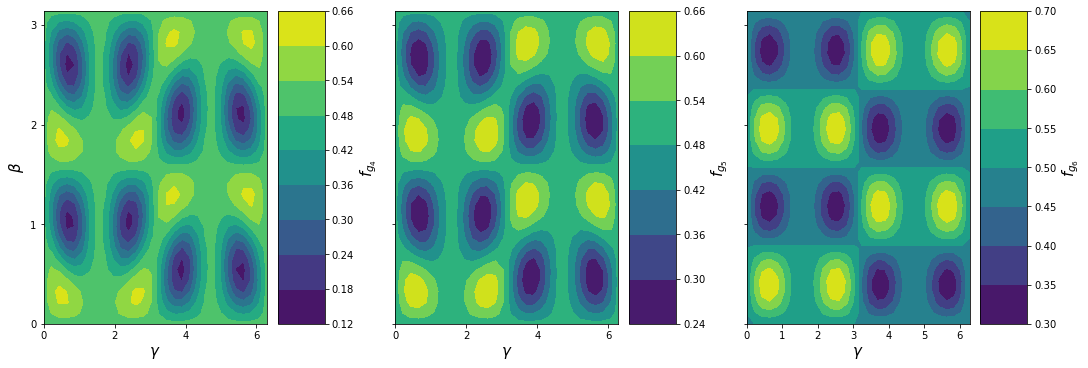

In [33]:
font_size = 15 # label font size
fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(15,5), sharey=True)

cs = axs[0].contourf(gamma,beta,f_g4.real.T,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[0])
cbar.ax.set_ylabel(r'$f_{g_4}$', fontsize=font_size)
axs[0].locator_params(nbins=4)

cs = axs[1].contourf(gamma,beta,f_g5.real.T,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[1])
cbar.ax.set_ylabel(r'$f_{g_5}$', fontsize=font_size)
axs[1].locator_params(nbins=4)

cs = axs[2].contourf(gamma,beta,f_g6.real.T,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[2])
cbar.ax.set_ylabel(r'$f_{g_6}$', fontsize=font_size)
    
axs[0].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[1].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[2].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[0].set_ylabel(r"$\beta$", fontsize=font_size)

plt.savefig("images/contour_plots_f_g4_g5_g6_angle_dependence_real_"+str(scan_number)+"_scans.png", dpi=200)

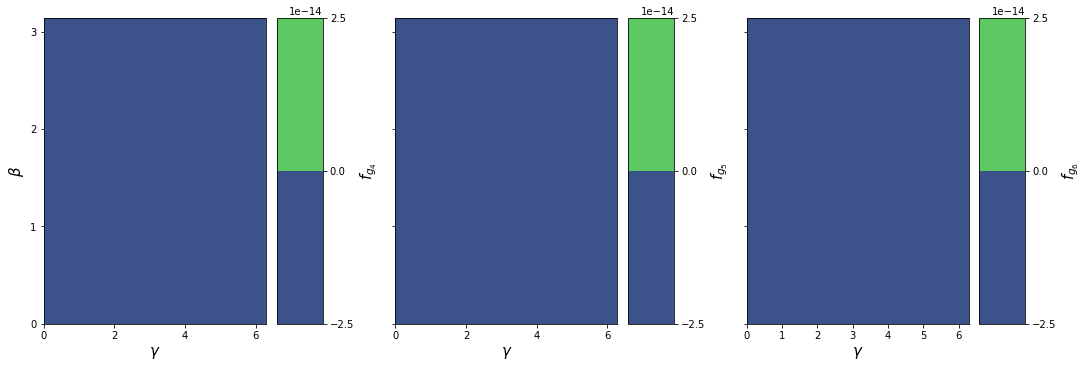

In [25]:
font_size = 15 # label font size
fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(15,5), sharey=True)

cs = axs[0].contourf(gamma,beta,f_g4.imag,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[0])
cbar.ax.set_ylabel(r'$f_{g_4}$', fontsize=font_size)
axs[0].locator_params(nbins=4)

cs = axs[1].contourf(gamma,beta,f_g5.imag,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[1])
cbar.ax.set_ylabel(r'$f_{g_5}$', fontsize=font_size)
axs[1].locator_params(nbins=4)

cs = axs[2].contourf(gamma,beta,f_g6.imag,xunits=radians,yunits=radians)
cbar = fig.colorbar(cs, ax=axs[2])
cbar.ax.set_ylabel(r'$f_{g_6}$', fontsize=font_size)
    
axs[0].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[1].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[2].set_xlabel(r"$\gamma$", fontsize=font_size)
axs[0].set_ylabel(r"$\beta$", fontsize=font_size)

plt.savefig("images/contour_plots_f_g4_g5_g6_angle_dependence_imag_"+str(scan_number)+"_scans.png", dpi=200)